## Description:

## Assignment: Working with Dependency Graphs (Parses)

The objective of the assignment is to learn how to work with dependency graphs by defining functions.

Read [spaCy documentation on dependency parser](https://spacy.io/api/dependencyparser) to learn provided methods.

Define functions to:
- extract a path of dependency relations from the ROOT to a token
- extract subtree of a dependents given a token
- check if a given list of tokens (segment of a sentence) forms a subtree
- identify head of a span, given its tokens
- extract sentence subject, direct object and indirect object spans

In [26]:
#first import spacy
import spacy 

#load the language
nlp = spacy.load("en_core_web_sm")

In [27]:
#decalare sentence 
spacy_sentence = 'Emirates airline cancelled our ﬂight this morning which was already late'
spacy_doc = nlp(spacy_sentence)

# Noun chunks

In [28]:
#printing Noun chunks for a given sentence 
for token in spacy_doc:
    print("{}\t\t{}\t\t{}\t\t{}\t\t{}".format(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children]))

Emirates		compound		airline		NOUN		[]
airline		nsubj		cancelled		VERB		[Emirates]
cancelled		ROOT		cancelled		VERB		[airline, ﬂight, morning, was]
our		poss		ﬂight		NOUN		[]
ﬂight		dobj		cancelled		VERB		[our]
this		det		morning		NOUN		[]
morning		npadvmod		cancelled		VERB		[this]
which		nsubj		was		AUX		[]
was		advcl		cancelled		VERB		[which, already, late]
already		advmod		was		AUX		[]
late		acomp		was		AUX		[]


## First Function for Extract Dependency Path Root

In [29]:
def extract_Token_Path_Root(token, doc):
    path = []
    current = token

    while not current.dep_ == 'ROOT':
        
        path.insert(0, current.dep_)
        current = current.head
    
    path.insert(0, 'ROOT')
    return path

def sentPathRoot(sent):
    doc = nlp(sent)
    paths = {token.text: extract_Token_Path_Root(token, doc) for token in doc}
    return paths

In [30]:
sentPathRoot(spacy_sentence)

{'Emirates': ['ROOT', 'nsubj', 'compound'],
 'airline': ['ROOT', 'nsubj'],
 'already': ['ROOT', 'advcl', 'advmod'],
 'cancelled': ['ROOT'],
 'late': ['ROOT', 'advcl', 'acomp'],
 'morning': ['ROOT', 'npadvmod'],
 'our': ['ROOT', 'dobj', 'poss'],
 'this': ['ROOT', 'npadvmod', 'det'],
 'was': ['ROOT', 'advcl'],
 'which': ['ROOT', 'advcl', 'nsubj'],
 'ﬂight': ['ROOT', 'dobj']}

## Second Function for Extract Subtree

In [31]:
def extracting_Subtree(sent):

    return {token.text: list(token.subtree) for token in nlp(sent)}

In [32]:
#calling method
extracting_Subtree(spacy_sentence)

{'Emirates': [Emirates],
 'airline': [Emirates, airline],
 'already': [already],
 'cancelled': [Emirates,
  airline,
  cancelled,
  our,
  ﬂight,
  this,
  morning,
  which,
  was,
  already,
  late],
 'late': [late],
 'morning': [this, morning],
 'our': [our],
 'this': [this],
 'was': [which, was, already, late],
 'which': [which],
 'ﬂight': [our, ﬂight]}

## Third Function Checking if a given list of tokens (segment of a sentence) forms a subtree

In [33]:
def check_Subtree(sent, words):
    doc = nlp(sent)
    
    tokens = sorted([tk for tk in doc for w in words if tk.text == w])
    
    for tk in tokens:
        if sorted(tk.subtree) == tokens:
            return True
    return False

In [34]:
print("The value for given words are: ", check_Subtree(spacy_sentence, ['Emirates', 'already','late']))
print("The value for given words are: ", check_Subtree(spacy_sentence,['which', 'was', 'already', 'late']))

The value for given words are:  False
The value for given words are:  True


## Fourth Function Identifying the head of a span, given its tokens

In [35]:
def head_Of_List(words):
    # join the words in a list and computer the head of the span composed by the full parsed joined list of words
    # convert words to a parsed span (a doc's sentence) and get its root
    # used next() to get just the first sentence as the expected input shouldn't
    joinList = ' '.join(words)
    doc = nlp(joinList)
    rootword = doc.sents
    head = next(rootword).root
    return head

In [36]:
print(spacy_sentence)
head_Of_List(spacy_sentence.split())

Emirates airline cancelled our ﬂight this morning which was already late


cancelled

## Fifth Function Extracting  subject, direct object and indirect object spans from sentence


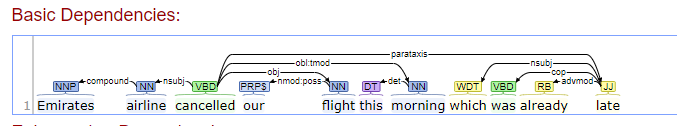

In [37]:
def extract_Direct_Indirect_Span(sent):
    doc = nlp(sent)
    deps = ['nsubj', 'dobj', 'iobj']
   
    # create dict of lists for each dependency
    spans = {k: [] for k in deps}

    # iterate over the dependency and all the tokens
    for dep in deps:
        for token in doc:
            if token.dep_ == dep:
                # if a dependency is found, add its token to the corresponding list
                # the token is added as a span object by slicing the doc
                spans[dep].append(doc[token.i:token.i+1])
        
    return spans

In [38]:
extract_Direct_Indirect_Span(spacy_sentence)

{'dobj': [ﬂight], 'iobj': [], 'nsubj': [airline, which]}